In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

from google.colab import drive
drive.mount("/content/drive")

In [ ]:
#import table
country_region = pd.read_csv("/content/drive/My Drive/Colab Notebooks/country_region.csv")

cdo = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CDO_raw_na.csv")
pmd = pd.read_csv("/content/drive/My Drive/Colab Notebooks/PMD_raw_na.csv")
gdp = pd.read_csv("/content/drive/My Drive/Colab Notebooks/GDP_raw_na.csv")

In [ ]:
country_region

,code,iso,country,region
0,4,AFG,Afghanistan,Southern Asia
1,8,ALB,Albania,Eastern Europe
2,12,DZA,Algeria,Greater Middle East
3,20,AND,Andorra,Global West
4,24,AGO,Angola,Sub-Saharan Africa
...,...,...,...,...
215,876,WLF,Wallis and Futuna Islands,Asia-Pacific
216,732,ESH,Western Sahara,Greater Middle East
217,887,YEM,Yemen,Greater Middle East
218,894,ZMB,Zambia,Sub-Saharan Africa


In [ ]:
pmd_melted = pmd.melt(id_vars=['code', 'iso', 'country'], var_name='year', value_name='value')
pmd_melted['year'] = pmd_melted['year'].str.split('.').apply(lambda r: r[2])
pmd_plot_line=pmd_melted.merge(country_region, left_on='code', right_on='code').groupby(["region","year"], as_index=False).sum().drop(['code'], axis=1)
pmd_plot_line

,region,year,value
0,Asia-Pacific,1990,28672.0678
1,Asia-Pacific,1991,0.0000
2,Asia-Pacific,1992,0.0000
3,Asia-Pacific,1993,0.0000
4,Asia-Pacific,1994,0.0000
...,...,...,...
235,Sub-Saharan Africa,2015,60350.6537
236,Sub-Saharan Africa,2016,0.0000
237,Sub-Saharan Africa,2017,0.0000
238,Sub-Saharan Africa,2018,0.0000


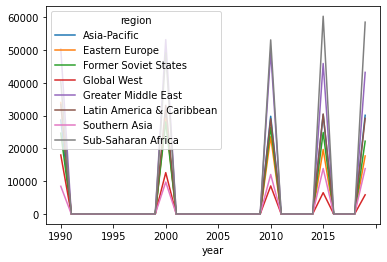

In [ ]:
pmd_plot_line.pivot(index='year', columns=['region'], values='value').plot.line()

In [ ]:
cdo_melted = cdo.melt(id_vars=['code', 'iso', 'country'], var_name='year', value_name='value')
cdo_melted['year'] = cdo_melted['year'].str.split('.').apply(lambda r: r[2])
cdo_plot_line=cdo_melted.merge(country_region, left_on='code', right_on='code').groupby(["region","year"], as_index=False).sum().drop(['code'], axis=1)
cdo_plot_line

,region,year,value
0,Asia-Pacific,1850,357.5479
1,Asia-Pacific,1851,376.5377
2,Asia-Pacific,1852,396.4435
3,Asia-Pacific,1853,418.1673
4,Asia-Pacific,1854,441.9146
...,...,...,...
1339,Sub-Saharan Africa,2013,841629.0000
1340,Sub-Saharan Africa,2014,880674.0000
1341,Sub-Saharan Africa,2015,891869.0000
1342,Sub-Saharan Africa,2016,908497.0000


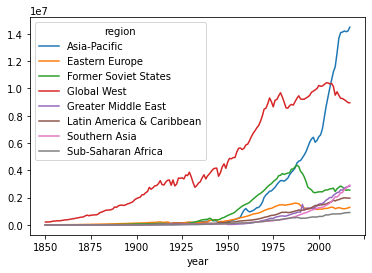

In [ ]:
cdo_plot_line.pivot(index='year', columns=['region'], values='value').plot.line()

In [ ]:
gdp_melted = gdp.melt(id_vars=['code', 'iso', 'country'], var_name='year', value_name='value')
gdp_melted['year'] = gdp_melted['year'].str.split('.').apply(lambda r: r[2])
pmd_country=pmd_melted.merge(country_region, left_on='code', right_on='code').groupby(by=["country_x"]).sum()
pmd_country

,code,value
country_x,,
Afghanistan,120,6400.1827
Albania,240,4915.7865
Algeria,360,10799.3070
Andorra,600,1480.0239
Angola,720,4673.5667
...,...,...
Wallis and Futuna Islands,26280,0.0000
Western Sahara,21960,0.0000
Yemen,26610,8475.1240


In [ ]:
cdo_melted = cdo.melt(id_vars=['code', 'iso', 'country'], var_name='year', value_name='value')
cdo_melted['year'] = cdo_melted['year'].str.split('.').apply(lambda r: r[2])
cdo_country=cdo_melted.merge(country_region, left_on='code', right_on='code').groupby(by=["country_x"]).sum()
cdo_country

,code,value
country_x,,
Afghanistan,672,194195.101
Albania,1344,299800.570
Algeria,2016,4200946.580
Andorra,3360,33245.070
Angola,4032,636086.300
...,...,...
Wallis and Futuna Islands,147168,0.000
Western Sahara,122976,0.000
Yemen,149016,694978.580


In [ ]:
gdp_melted = gdp.melt(id_vars=['code', 'iso', 'country'], var_name='year', value_name='value')
gdp_melted['year'] = gdp_melted['year'].str.split('.').apply(lambda r: r[2])
gdp_country=gdp_melted.merge(country_region, left_on='code', right_on='code').groupby(by=["country_x"]).sum()
gdp_country

,code,value
country_x,,
Afghanistan,120,7.653905e+11
Albania,240,6.320436e+11
Algeria,360,1.138767e+13
Andorra,600,0.000000e+00
Angola,720,3.070059e+12
...,...,...
Wallis and Futuna Islands,26280,0.000000e+00
Western Sahara,21960,0.000000e+00
Yemen,26610,2.136614e+12


In [ ]:
gdp_cdo_pmd=pd.merge(pd.merge(cdo_country,pmd_country,on="country_x"),gdp_country,on="country_x")
gdp_cdo_pmd.rename(columns = {'code_x':'code_cdo', 'value_x':'value_cdo',
                              'code_y':'code_pmd','value_y':'value_pmd',
                              'code':'code_gdp','value':'value_gdp'}, inplace = True)
gdp_cdo_pmd

,code_cdo,value_cdo,code_pmd,value_pmd,code_gdp,value_gdp
country_x,,,,,,
Afghanistan,672,194195.101,120,6400.1827,120,7.653905e+11
Albania,1344,299800.570,240,4915.7865,240,6.320436e+11
Algeria,2016,4200946.580,360,10799.3070,360,1.138767e+13
Andorra,3360,33245.070,600,1480.0239,600,0.000000e+00
Angola,4032,636086.300,720,4673.5667,720,3.070059e+12
...,...,...,...,...,...,...
Wallis and Futuna Islands,147168,0.000,26280,0.0000,26280,0.000000e+00
Western Sahara,122976,0.000,21960,0.0000,21960,0.000000e+00
Yemen,149016,694978.580,26610,8475.1240,26610,2.136614e+12


In [ ]:
#correlation between cdo and gdp
corr_cdo_gdp=gdp_cdo_pmd['value_cdo'].corr(gdp_cdo_pmd['value_gdp'])
print(corr_cdo_gdp)

0.9580618526943385


In [ ]:
#correlation between pmd and gdp
corr_pmd_gdp=gdp_cdo_pmd['value_pmd'].corr(gdp_cdo_pmd['value_gdp'])
print(corr_pmd_gdp)

0.01828331863998047
